In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils import aperture_photometry,CircularAnnulus,CircularAperture
from photutils import DAOStarFinder

In [2]:
image = 'hor1DRCs/jdan21010_drc.fits'

# fits.info(image)

hdu = fits.open(image)
sci_814 = hdu[1].data
hdr_814 = hdu[0].header
tab_814 = hdu[4].data
photflam_814 = hdu[1].header['PHOTFLAM']

# data = hdu[1].data[500:1000,2500:3000]
hdu.close()

In [3]:
image = 'hor1DRCs/jdan20010_drc.fits'

hdu = fits.open(image)
sci_606 = hdu[1].data
hdr_606 = hdu[0].header
tab_606 = hdu[4].data
photflam_606 = hdu[1].header['PHOTFLAM']

hdu.close()

In [4]:
# temp_sci_606=sci_606*hdr_606['texptime']
# temp_sci_814=sci_814*hdr_814['texptime']

In [5]:
# fits.writeto('hor1DRCs/F814W_cts_rawF.fits', \
#              temp_sci_814, header=hdr_814)
# fits.writeto('hor1DRCs/F606W_cts_rawF.fits', \
#              temp_sci_606, header=hdr_606)

In [6]:
image = 'hor1DRCs/F814W_cts_rawF.fits'

hdu = fits.open(image)
sci_814 = hdu[0].data
hdr_814 = hdu[0].header
hdu.close()

In [7]:
image = 'hor1DRCs/F606W_cts_rawF.fits'

hdu = fits.open(image)
sci_606 = hdu[0].data
hdr_606 = hdu[0].header
hdu.close()

In [8]:
data_814 = sci_814.copy()
data_606 = sci_606.copy()

In [9]:
mean_814, median_814, std_814 = sigma_clipped_stats(data_814, sigma=3.0, \
                                            maxiters=5)

mean_606, median_606, std_606 = sigma_clipped_stats(data_606, sigma=3.0, \
                                            maxiters=5)

In [10]:
# pos_file = np.genfromtxt('sDRC_2606/matchedDRCaper2906_bkgd.dat',names=True)

In [11]:
# catFile = np.genfromtxt('sDRC_2606/matchedDRCaper2906_bkgd.dat')

In [12]:
# xpos_606 = pos_file['xr_f606w']-0.5
# ypos_606 = pos_file['yr_f606w']-0.5

# xpos_814 = pos_file['xr_f814w']-0.5
# ypos_814 = pos_file['yr_f814w']-0.5

In [13]:
# loc_606 = np.array([xpos_606,ypos_606])
# positions_606 = np.transpose(loc_606)

# loc_814 = np.array([xpos_814,ypos_814])
# positions_814 = np.transpose(loc_814)

In [14]:
daofind_606 = DAOStarFinder(fwhm=2.5, threshold=5.*std_606)
sources_606 = daofind_606(data_606 - median_606)

daofind_814 = DAOStarFinder(fwhm=2.5, threshold=5.*std_814)
sources_814 = daofind_814(data_814 - median_814)

In [15]:
loc_606 = np.array([sources_606['xcentroid'], sources_606['ycentroid']])
positions_606 = np.transpose(loc_606)

loc_814 = np.array([sources_814['xcentroid'], sources_814['ycentroid']])
positions_814 = np.transpose(loc_814)

In [16]:
apertures_r4_606 = CircularAperture(positions_606, r=4.)
rawflux_r4_606 = aperture_photometry(data_606, apertures_r4_606)
# print(rawflux_r4_606[:10])

In [17]:
apertures_r4_814 = CircularAperture(positions_814, r=4.)
rawflux_r4_814 = aperture_photometry(data_814, apertures_r4_814)
# print(rawflux_r4_814[:10])

In [18]:
from astropy.stats import SigmaClip
from photutils import Background2D, MedianBackground,SExtractorBackground

In [19]:
# sigma_clip = SigmaClip(sigma=2.5)
# bkg_estimator = SExtractorBackground()
# bkg = Background2D(data_814,(50,50),filter_size=(3,3), sigma_clip=sigma_clip,\
#                   bkg_estimator=bkg_estimator)

In [20]:
# print(bkg.background_median)
# print(bkg.background_rms_median)

In [21]:
# plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
# plt.colorbar()

In [22]:
# plt.imshow(data_814 - bkg.background, origin='lower',\
#            cmap='Greys_r')

In [23]:
annulus_apertures_606 = CircularAnnulus(positions_606, r_in=9., \
                                        r_out=12.)
annulus_apertures_814 = CircularAnnulus(positions_814, r_in=9., \
                                        r_out=12.)

In [24]:
annulus_masks = annulus_apertures_606.to_mask(method='center')

bkg_median = []
for mask in annulus_masks:
    
    annulus_data = mask.multiply(data_606)
    annulus_data_1d = annulus_data[mask.data > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)

bkg_median_606 = np.array(bkg_median)

In [25]:
annulus_masks = annulus_apertures_814.to_mask(method='center')

bkg_median = []
for mask in annulus_masks:
    
    annulus_data = mask.multiply(data_814)
    annulus_data_1d = annulus_data[mask.data > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)

bkg_median_814 = np.array(bkg_median)

In [26]:
rawflux_r4_606['annulus_median'] = bkg_median_606
print(rawflux_r4_606['annulus_median'][:100])

   annulus_median   
--------------------
                 0.0
                 0.0
   4.716374397277832
 -0.4758172035217285
    8.89276647567749
   23.08725929260254
   3.163696765899658
   2.090338945388794
-0.06747870147228241
 -0.2867368459701538
                 ...
  18.898999214172363
   9.113069534301758
   65.59733581542969
  3.0624659061431885
   6.227757930755615
   5.259437084197998
   15.48948860168457
  0.5980069637298584
  47.087677001953125
  18.855414390563965
   5.574774503707886
Length = 100 rows


In [27]:
# plt.hist(rawflux_r4_606['annulus_median'],bins=100,range=(2,200))
# plt.show()

In [28]:
rawflux_r4_814['annulus_median'] = bkg_median_814
print(rawflux_r4_814['annulus_median'][:10])

   annulus_median  
-------------------
                0.0
 5.3596415519714355
-2.4369845390319824
-3.7400870323181152
-5.8628339767456055
 3.4612783193588257
 0.3532238304615021
-0.4477629065513611
 2.1051087379455566
 16.566051483154297


In [29]:
rawflux_r4_606['aper_bkg'] = bkg_median_606*apertures_r4_606.area
print(rawflux_r4_606['aper_bkg'][:10])

      aper_bkg     
-------------------
                0.0
                0.0
  237.0708345290724
-23.917181296568028
   446.999197281248
 1160.4922269626052
 159.02474428697846
 105.07189558953714
 -3.391849485105619
-14.412965901013493


In [30]:
# plt.hist(rawflux_r4_606['aper_bkg'],range=(5,10000))
# plt.show()

In [31]:
rawflux_r4_814['aper_bkg'] = bkg_median_814*apertures_r4_814.area
print(rawflux_r4_814['aper_bkg'][:10])

      aper_bkg     
-------------------
                0.0
  269.4049684087689
-122.49620359575655
-187.99727911227268
   -294.69817840897
   173.982824642037
 17.754966253611222
-22.507018524348304
 105.81430633819907
  832.7005702154854


In [32]:
rawflux_r4_606['final_phot'] = rawflux_r4_606['aperture_sum'] \
    - rawflux_r4_606['aper_bkg']

# finIdx = np.logical_and(np.isfinite(rawflux_r4_606['final_phot']),\
#                         rawflux_r4_606['final_phot']>0)
# rawflux_r4_606 = rawflux_r4_606[finIdx]
# print(rawflux_r4_606['final_phot'][:10])

In [33]:
rawflux_r4_814['final_phot'] = rawflux_r4_814['aperture_sum'] \
    - rawflux_r4_814['aper_bkg']

# finIdx = np.logical_and(np.isfinite(rawflux_r4_814['final_phot']),\
#                         rawflux_r4_814['final_phot']>0)
# rawflux_r4_814 = rawflux_r4_814[finIdx]
# print(rawflux_r4_814['final_phot'][:10])

In [34]:
EEVband = 0.839 #4 pix rad
EEIband  = 0.830 #4 pix rad

# ZPV = 26.667
# ZPI = 26.779

ZPV = 21.1
ZPI = 21.1

In [35]:
mask_negative = (rawflux_r4_606['final_phot'] > 0) 
rawflux_pos_r4_606 = rawflux_r4_606[mask_negative]

/Users/hr8jz/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [36]:
mask_negative = (rawflux_r4_814['final_phot'] > 0) 
rawflux_pos_r4_814 = rawflux_r4_814[mask_negative]

In [37]:
other_606 = -2.5*np.log10(photflam_606/hdr_606['texptime']/EEVband)
other_814 = -2.5*np.log10(photflam_814/hdr_814['texptime']/EEIband)

In [38]:
print(-2.5*np.log10(photflam_606)-21.1)

26.66733400012398


In [39]:
final_phot_606 = -2.5*np.log10(rawflux_pos_r4_606['final_phot']) \
    + other_606 - ZPV
print(final_phot_606[:10])

    final_phot    
------------------
29.275385116555825
25.413042868706505
27.403161650803817
25.620846113543493
27.357396530319043
26.824271966669684
26.421327455709893
 29.09027407880368
26.253258088793153
 27.82047978362568


In [40]:
final_phot_814 = -2.5*np.log10(rawflux_pos_r4_814['final_phot']) \
    + other_814 - ZPI
print(final_phot_814[:10])

    final_phot    
------------------
25.917458041422215
25.682379583555125
 27.73371325461276
26.265490013826387
26.208914391295487
26.514976373472216
26.871163982783358
26.686338452084975
25.817382870364632
28.776571354025457


In [41]:
len(final_phot_814)

5750

In [42]:
len(final_phot_606)

6070

In [43]:
rawflux_pos_r4_814.dtype.names

('id',
 'xcenter',
 'ycenter',
 'aperture_sum',
 'annulus_median',
 'aper_bkg',
 'final_phot')

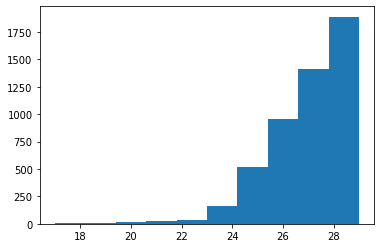

In [44]:
plt.hist(final_phot_814,range=(17,29))
plt.show()

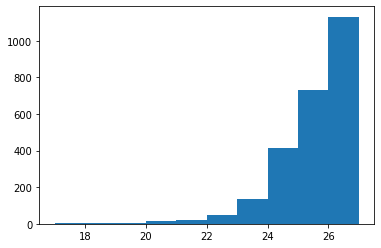

In [45]:
plt.hist(final_phot_606,range=(17,27))
plt.show()

In [46]:
# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8),sharex=True,sharey=True)


# ax1.scatter(pos_file['m606cAPER']-pos_file['m814cAPER'],pos_file['m606cAPER'],s=12,label='Mattia APER')
# ax1.scatter(final_phot_606-final_phot_814,final_phot_606,s=10,label='photUtils')

# ax2.scatter(pos_file['magr_f606w']-pos_file['magr_f814w'],pos_file['magr_f606w'],s=12,label='DRC')
# ax2.scatter(final_phot_606-final_phot_814,final_phot_606,s=10,label='photUtils')

# ax1.set_ylim(28,17.5)
# ax1.set_xlim(-1.5,1)

# ax1.legend()
# ax2.legend()

# plt.show()

In [47]:
len(final_phot_606)

6070

In [48]:
len(final_phot_814)

5750

In [49]:
rawflux_pos_r4_814['magr'] = final_phot_814
rawflux_pos_r4_606['magr'] = final_phot_606

In [50]:
rawflux_pos_r4_814['id'] = np.arange(0,len(rawflux_pos_r4_814),1)
rawflux_pos_r4_606['id'] = np.arange(0,len(rawflux_pos_r4_606),1)

In [51]:
s0 = ' '
header = s0.join(rawflux_pos_r4_606.dtype.names)
print(header)

id xcenter ycenter aperture_sum annulus_median aper_bkg final_phot magr


In [52]:
np.savetxt('catRawMags10Aug/catDir_HOROLOGIUM-I/drcPU_F606W.dat',rawflux_pos_r4_606,header=header)
np.savetxt('catRawMags10Aug/catDir_HOROLOGIUM-I/drcPU_F814W.dat',rawflux_pos_r4_814,header=header)

In [53]:
# newCol = np.zeros((len(pos_file),4))
# newCol[:,0] = final_phot_606
# newCol[:,1] = final_phot_814
# newCol[:,2] = rawflux_r4_606['aper_bkg']
# newCol[:,3] = rawflux_r4_814['aper_bkg']

In [54]:
# colNs = np.array(pos_file.dtype.names)
# s0 = ' '
# header = s0.join(colNs)
# header += ' pUmag_f606w pUmag_f814w pUbkg_f606w pUbkg_f814w'

In [55]:
# np.savetxt('photUtils0820/matchedPast.dat',outArr,header=header)